# Pandas Data Processing - Data aggregation, transformation and cleaning

**What we cover:**

**Part 1 - Combining DataFrames**
- Concatenation
- Joining datasets
- Cardinality
- Types of Joins
    - Left Join
    - Inner Join
    - Full Outer Join
    - Right Join

**Part 2 - Data Preparation**
- Removal of superfluous data
- Making data more usable
- Using the pandas `.apply()` method
- Using the `.nunique()` method

**Part 3 - Data Grouping and Aggregation**
- Using the pandas `.groupby()` method
- Using the pandas `.agg()` method
- Combining `.groupby()` with `.agg()`


### What is data processing?

- The collection and transformation of data into meaningful information. Usually performed by a data analyst, data engineer or data scientist.

- Arguably this could encompass elements throughout the **data lifecycle**, but here we are primarily concerned with:
    - **Data aggregation**: *combining* data from several sources
    - **Data transformation**: changing the *format* or *structure* of a dataset
    - **Data cleaning**: dealing with *incomplete*, *incorrect*, or *inconsistent* values



## Part 1 - Combining DataFrames

### ☑️ Concatenation

- The addition of one dataset to another
- Typically used to **extend** a dataset with extra rows or columns
- To achieve this we can use the pandas `.concat()` method

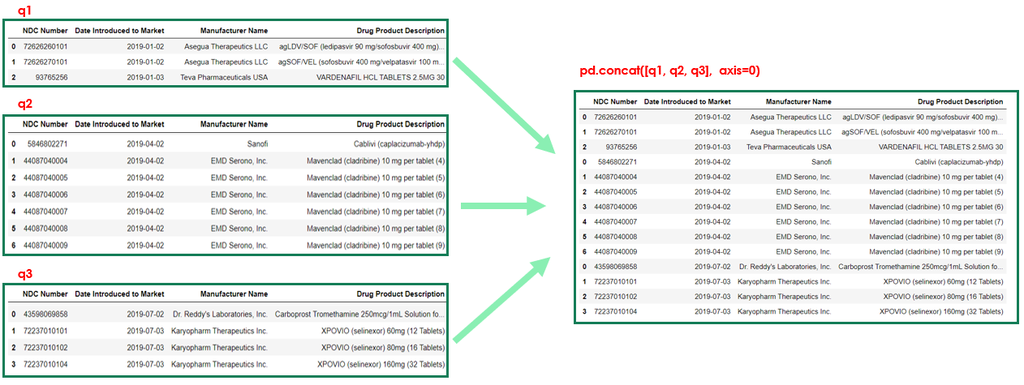

#### Importing CSV Data

In [1]:
import numpy as np # we'll use this later
import pandas as pd

q1 = pd.read_csv('data/new-drugs-q1.csv')
q2 = pd.read_csv('data/new-drugs-q2.csv')
q3 = pd.read_csv('data/new-drugs-q3.csv')

Each file contains information about new prescription drugs made available in California during a given quarter of 2019, based on data from OSHPD).

In [2]:
for q in [q1, q2, q3]:
    print(q.shape, q.columns)

- We have read the data and created a DataFrame from each CSV file
- We have confirmed that they contain the same columns in the same order
- Column descriptions are as follows
    - **NDC Number** - National Drug Code (NDC), a unique product identifier for human drugs in the United States
    - **Date Introduced to Market** - Date the drug was first released to the US market
    - **Manufacturer Name** - Drug Manufacturer Name
    - **Drug Product Description** - Drug Description

#### Concatenating DataFrames using `.concat()` method

In [3]:
df = pd.concat([q1, q2, q3], axis=0)
df

In [4]:
print(df.shape)

- We used the pandas `.concat()` method, passing a list of DataFrames as the only argument
- The `axis` parameter determines whether to concatenate along **rows** or **columns**
    - The default `0` is used here to combine rows from DataFrames with shared column names
    - `axis=1` would be used to extend a dataset with additional columns

In [5]:
df.index

- Notice that the **index labels are unchanged** from what they were in each DataFrame, i.e. there are duplicated values

In [6]:
df = pd.concat([q1, q2, q3], axis=0, ignore_index=True)
df.head()

- We can create new unique row index labels if we want to by passing `ignore_index=True` to the `.concat()` method 

In [7]:
df['NDC Number'].value_counts().max()

In [8]:
df_new = df.set_index('NDC Number')
df_new.head()

- We can see from using the `.value_counts()` Series method that `NDC Number` contains no duplicate values
- We used the `.set_index()` method to use `NDC Number` as our index in a new DataFrame assigned to `df_new`

### ☑️ Joining datasets

- We often need to **join** or merge datasets which have some **association** with one another
- The **join** (or relationship) requires a common **column** (or key) in each dataset so that they can be combined


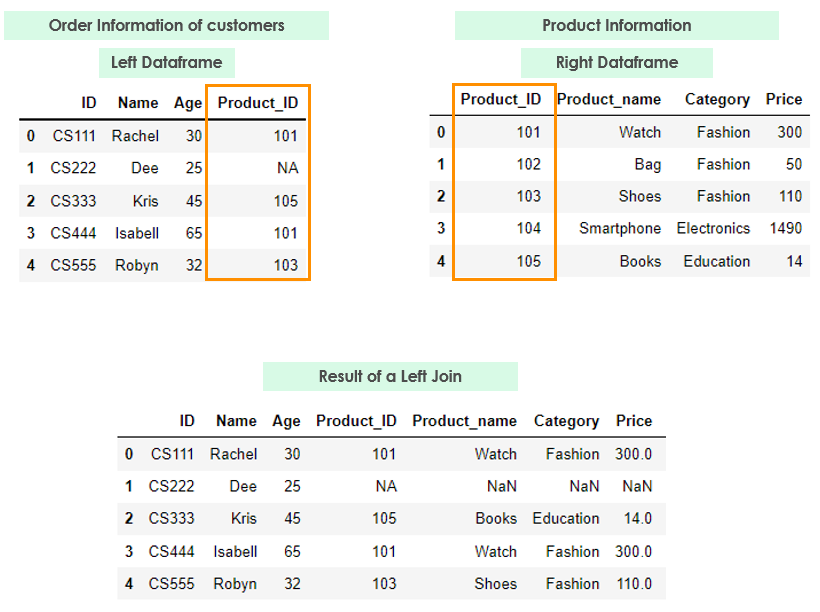

When it comes to **joins**, there are two things to consider:
1. Cardinality
2. Type of join

#### Cardinality
Is the number of related rows for each of the two datasets in the join/relationship.

- **one-to-one joins**   
Each dataset contains the same number of shared, unique values in the key
 
- **many-to-one joins**   
The first dataset has numerous instances of one or more of the values in the key while the second dataset only has one instance of each value

- **many-to-many joins**  
Both datasets have numerous instances of one or more of the values in the key


#### Type of join

| Type of join | Description   |
|:- |:- |
|   **LEFT JOIN**  | Returns all rows from the left table, and the matched rows from the right table|
|   **INNER JOIN**  | Returns rows that have matching values in both tables|
|   **FULL OUTER JOIN**  | Returns all the rows from both tables, whether they have a matching row or not|
|   **RIGHT JOIN**  | Returns all rows from the right table, and the matched rows from the left table|

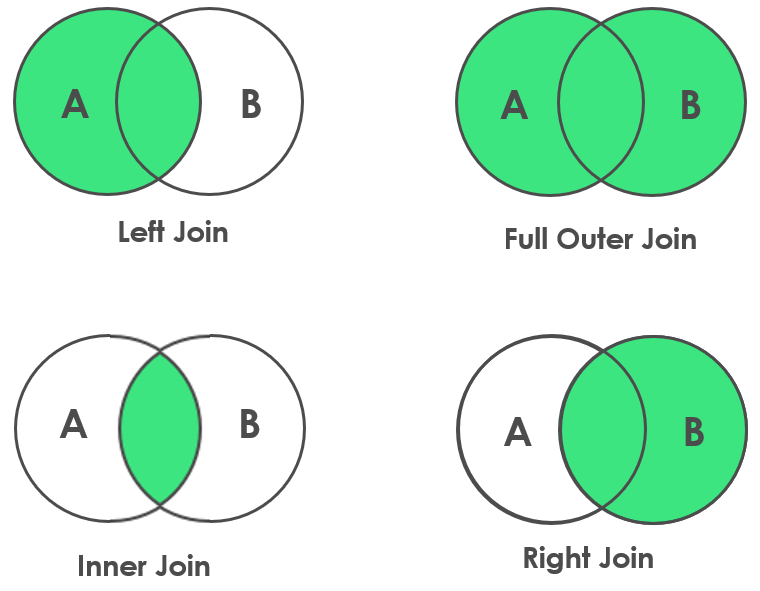

#### Using the pandas `.merge()` method

Pandas uses terminology borrowed from **SQL** (a popular language for **querying databases**) in the syntax for its methods which provide functionality for joining datasets. 

#### Examples of different joins with small datasets

There are several small DataFrames created in the `dataframes.py` file; let's take a look at two of them and then see how they can be merged:

In [9]:
from dataframes import customers, products

display(customers, products)

We would like to add the `Product_name`, `Category`, `Price` columns to the `customers` table:

In [10]:
customers.merge(products, how="left", left_on="Product_ID", right_on="Product_ID", indicator=True)

- `how=left` means that all records from the left table and the matched records from the right table are returned
- the `left_on` and `right_on` arguments are used to identify the column on which to join the tables
    - although here the column name is the same, they could be different in other scenarios
- `indicator=True` adds a column giving information about the source of each row in relation to the join
- If there is no data to show `NaN` (missing value) markers are returned 

In [11]:
customers.merge(products, how="inner", left_on="Product_ID", right_on="Product_ID", indicator=True)

- `how=inner` means that records that have matching values in both tables are returned

In [12]:
customers.merge(products, how="outer", left_on="Product_ID", right_on="Product_ID", indicator=True)

- `how=outer` returns all the rows from both tables, whether they have a matching row or not

In [13]:
customers.merge(products, how="right", left_on="Product_ID", right_on="Product_ID", indicator=True)

If we wanted to retain all of the names from the right table (`products`), we can use `how="right"`:

In [14]:
products.merge(customers, how="left", left_on="Product_ID", right_on="Product_ID", indicator=True)

A similar result could be achieved by reversing the table order and using `how=left` instead of `how=right`:
- The only difference here is the column order

#### Joining DataFrames using each index as the key

In [15]:
display(df_new.head())
df_new.shape

- Notice `df_new` has the `NDC Number` column set as the index

In [16]:
df_info = pd.read_csv('data/drugs-data-a.csv', index_col='NDC Number')
display(df_info.head())
df_info.shape

- Notice how we used the `index_col` parameter with the pandas `read_csv()` method to use the values in the `NDC Number` column as our index

In [17]:
df_index = df_new.merge(df_info, how='left', left_index=True, right_index=True)
df_index.head()

- Here we used a **LEFT JOIN** (`how=left`) since we want to retain all data in the original DataFrame `df_new` and supplement it with associated data from the DataFrame `df_info`
- We used `left_index=True` and `right_index=True` to specify the `index` of each DataFrame as the **key** on which they will be joined
- We can see that the default values for the `suffix` parameter have been used since there was a column in both of the DataFrames labelled `Date Introduced to Market`

- As always, remember that you can and should refer to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) if:
    - You have an **unusual scenario** to deal with or your **output is not as expected**
    - You regularly use a given method - the **optional parameters** often provide a quick way to **carry out common further processing tasks**

## Part 2 - Data Preparation

Data  **pre-processing** or **cleaning** is often required to get our raw data into a more usable state:

- **Removal** of data not required for our task
- **Conversion** of values to an appropriate data type
- Checking for **missing values** and **fixing errors**

### ☑️ Removal of superfluous data

We can use methods and syntax previously seen to reduce the number of rows and columns in our dataset.

In [18]:
df_data = pd.read_csv('data/drugs.csv', index_col='NDC Number')
df_data.head(1)

In [19]:
cols_to_drop = ['Date Introduced to Market',
                'Acquisition Date', 
                'Acquisition Price',
                'Marketing/Pricing Plan Description',
                'Acquisition Price Comment', 
                'General Comments', 
                'Supporting Documents']

df_cols = df_data.drop(cols_to_drop, axis=1)
df_cols.head(1)

- The DataFrame `.drop()` method allows us to drop any columns (`axis=1`) which are not required

In [20]:
df_sub = df_cols.copy()
df_sub = df_sub[df_sub['Manufacturer Name']!='Kyowa Kirin, Inc.']

display(df_cols.shape)
df_sub.shape

- We can remove rows which have particular values in a given column
- Using `.copy()` ensures that `df_sub` is a distinct object in memory and that subsequent changes to it will not affect the original DataFrame `df_cols`

### ☑️ Making data more usable  

We may encounter datasets where particular values are represented in a way which are **not suitable for analysis**, for example:

- Boolean values are **represented differently** (`Yes` | `No` or `1` | `0`)
- Percentages have **inconsistent formatting** (`0.42` or `42%`)
- Ambiguous dates have been **misinterpreted** (`dd-mm-yy` or `mm-dd-yy`)

After examining the dataset we notice that all of the `Indicator` columns contain values which are either `1.0` or `NaN`; we decide that replacing the `NaN` values with zeros will help with our analysis:

In [21]:
df_sub.columns

In [22]:
indicator_columns = df_sub.columns[df_sub.columns.str.contains("Indicator")]
df_sub[indicator_columns] = df_sub[indicator_columns].fillna(0).astype(int)
df_sub.head(3)

- We used the `.columns` attribute to access the column labels, and the `.contains()` method on the string (`.str`) of each one to identify those which contain `'Indicator'`
- The `.fillna()` method replaced the `NaN` values with `zeros` in the `indicator_columns`
- `.astype(int)` converts `indicator_columns` data type to `int` 

We also notice that in the `Estimated Number of Patients` column, we see both `NaN` values and `0.0` values:

In [23]:
display(df_sub['Estimated Number of Patients'].isna().sum())
df_sub[df_sub['Estimated Number of Patients'] == 0].shape[0]

We determine that the `0.0` values should be `NaN` values because we assume they must be missing (rather than there being an expectation that `Estimated Number of Patients` will actually be zero):

In [24]:
df_clean = df_sub.copy()
df_clean['Estimated Number of Patients'] = df_clean['Estimated Number of Patients'].replace(0, np.nan)
df_clean.head(3)

- We used `.copy()` to create a copy of `df_sub`
- We used the `.replace()` method to replace `zeros` with `NaN` values, which can be created using `np.nan`
    - `np` is the alias we used when importing `numpy` earlier
    - the `.nan` attribute defines `NaN` values


### ☑️ Using the pandas `.apply()` method

- The `.apply()` method allows us to **apply our own functions** to our data

- Typically this is used to create a new column or update an existing one with the results of calling the function with an existing column of values

In our drugs example, we notice that we have several instances where multiple entries in `Drug Product Description` refer to the same drug but with differing dosage levels. We create a function which returns only the first word: 

In [25]:
def first_word(description):
    
    if ' ' in description:
        return description.split(' ')[0]
    
    else:
        return description

- This function has a single parameter `description` and needs to be called with a string
- The `.split()` method splits the string wherever there is a space (`' '`) and then the first item (`[0]`) in the resulting list is accessed
    - In the absence of a space, `description` is returned

In [26]:
df_clean['Short Description'] = df_clean['Drug Product Description'].apply(first_word)

- We then used the `.apply()` method to apply our `first_word` function to `Drug Product Description`, creating the new column `Short Description`

In [27]:
df_clean.head()

### ☑️ Using the `.nunique()` method

The `.nunique()` method allows us to identify the **number of unique values** in a Series:

In [28]:
df_clean['Drug Product Description'].nunique()

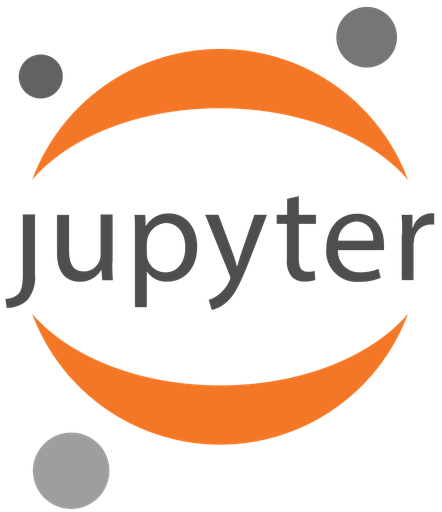

Now open the following workbook: `processing-pandas-workbook.ipynb` and work on parts 1 and 2.

## Part 3 - Data Grouping and Aggregation

### ☑️ Using the pandas `.groupby()` method

- We often need to calculate metrics for **subsets** (or groups) of data
- A dataset can be **split** into **groups** of rows with common values in a given column
- **Calculations** can be **applied** to all groups simultaneously
- The **results** of these calculations can then be **combined** back together



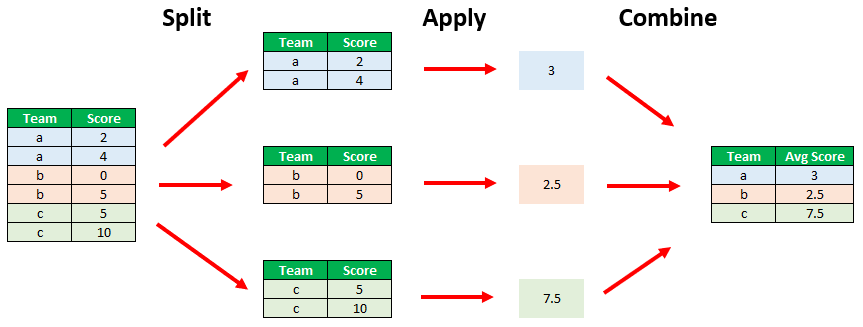

In [29]:
from dataframes import tscore
tscore

In [30]:
tscore.groupby('Team')[['Score']].mean()

- with the `tscore` DataFrame, `groupby` column `Team` and calculate for column `['Score']` the `mean` of each group
- In this particular example, the result would be the same with the omission of `[['Score']]`; **if no columns are specified, the function is applied to all columns** in the DataFrame

- Using **[single parentheses]** is possible when only specifying a **single column** to perform the operation on, but will result in a **Series** rather than a DataFrame being returned

Another example showing a `.count()`method being applied, to group by:

In [31]:
tscore.groupby('Team')[['Score']].count()

Here's an example which applies the `.sum()`method to a subset of columns, with rows grouped by `Manufacturer Name`:

In [32]:
indicators = df_clean.groupby('Manufacturer Name')[['Priority Review Indicator', 
                                                    'Breakthrough Therapy Indicator',
                                                    'Marketing/Pricing Plan Non-Public Indicator', 
                                                    'Acquisition Price Non-Public Indicator']].sum()

indicators.tail(5)

In [33]:
indicators.columns=[ 'Priority', 'Breakthrough', 'Marketing', 'Acquisition']
ind_total = indicators.sort_values(by=['Priority'], ascending=False)
ind_total.head(5)

- Here we have updated the column labels and used the `sort_values()` method to improve readability

### ☑️ Using the pandas `.agg()` method

In [34]:
ind_total.agg(['sum', 'mean'])

- Using `.agg()` on a DataFrame applies the **functions** in the **[list]** on every **column** (the `axis` parameter has a default value of `0`)

In [35]:
ind_total.agg(['sum'], axis=1).sort_values(by='sum', ascending=False).rename(columns={'sum':'Total Indicators'}).head(3)

- `axis=1` applies the function(s) to each row
- The **function name** is used for the resulting **column label** by default; here we used the `.rename()` method to update it

### ☑️ Combining `.groupby()` with `.agg()`

In [36]:
manu_agg = df_clean.groupby('Manufacturer Name').agg(entries=('Manufacturer Name', 'size'), 
                                                     patient_estimates=('Estimated Number of Patients', 'count'))

manu_agg.head()

In [37]:
manu_agg['missing_estimates'] = manu_agg['entries'] - manu_agg['patient_estimates']

manu_agg.sort_values(by='missing_estimates', ascending=False).head()

- Here we have used `.agg()` to **apply multiple functions** to a `groupby()` object
- Notice how each element in the tuple passed to `.agg()` is constructed as follows: 
```python
    result_column_name=('source_column', 'function')
```

- `'size'` returns the **number of values** in the given column, **including `NaN` values** (as such, the choice of column on which to apply it is unimportant, since all columns in a given DataFrame will have the same number)
- `'count'` **excludes `NaN` values**, so here the difference between the columns in `manu_agg` tells us how many entries do not have `patient_estimates` 

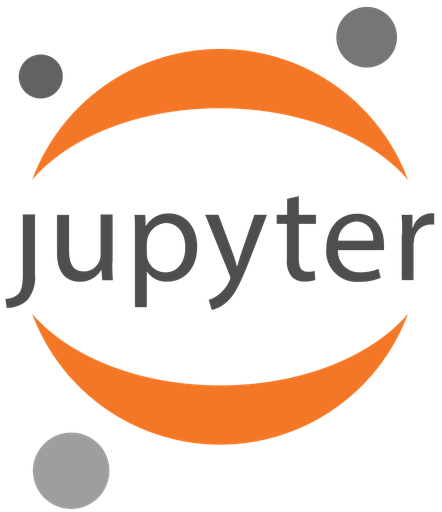

Now open the following workbook: `processing-pandas-workbook.ipynb` and work on the last part, Part 3.